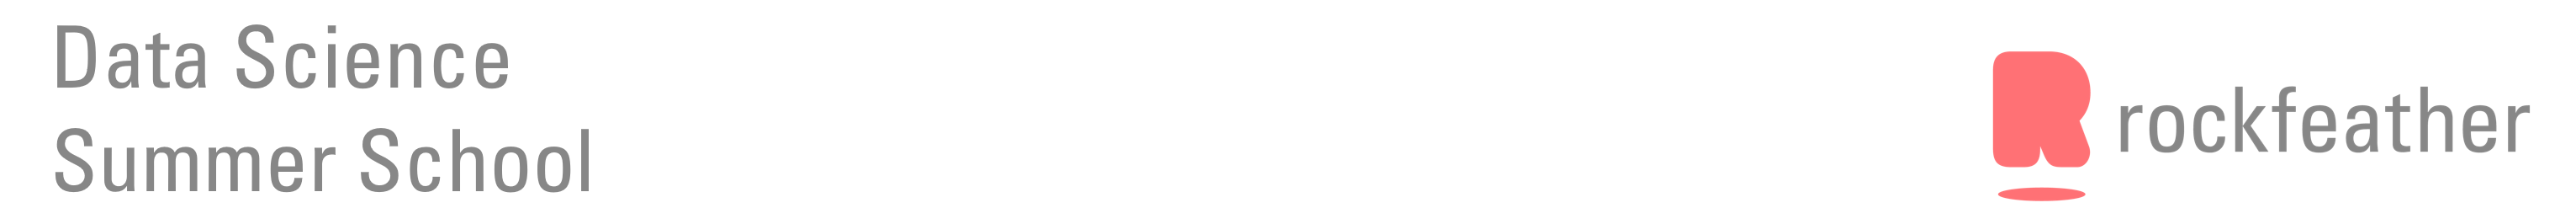

# Python Cheat Sheet

Outline:

1. Jupyter Notebooks
2. Python Packages
    - **numpy**: Scientific Computing
    - **pandas**: Working with Data
    - **matplotlib**: Visualization
    - **sklearn**: Machine Learning
3. Functions

## 1. Jupyter Notebooks

Notebooks are handy tools that allow us to run code and see the code directly. Short-cuts can make life easier for us. Here are the basic ones.

When cell is selected/When inside cell (cursor blinking):
- `Ctrl` + `Enter`: run selected cells
- `Shift` + `Enter`: run selected cells, select cell below
- `Alt` + `Enter`: run the current cell, insert below
- `Ctrl` + `s`: save and checkpoint

When cell is selected:
- `a`: insert cell above 
- `b`: insert cell below
- `x`: cut cell 
- `c`: copy cell
- `v`: past cell below

To get inside a cell when cell is selected, press `Enter`. When inside cell, press `Esc` to go outside.

## 2. Python Packages

Although the base Python language can do simple mathematical operations, such as adding/subtracting, defining variables and functions, etc., most work requires the use of *other packages*. Here we will cover some of the most popular ones, which include *numpy*, *pandas*, *matplotlib*, and *sklearn*.

### *2.1 NumPy*
Scientific Computing

In [1]:
# Import the package
import numpy as np
from numpy.random import randn

In [2]:
# Generate random number
randn()

1.219560335842988

In [3]:
# General math operations
np.square(2), np.mean([4,5,6,7,8]), np.sqrt(16), np.abs(-5)

(4, 6.0, 4.0, 5)

### 2.2 *Pandas*
Working with Data

In [4]:
# Import the package
import pandas as pd

In [5]:
# Create a dummy dataframe
df = pd.DataFrame(
    data=randn(5,4),
    index='A B C D E'.split(),
    columns='W X Y Z'.split()
    )
df.iloc[2,3] = None

In [6]:
# Viewing the top 5 rows
df.head(5)

,W,X,Y,Z
A,0.628736,-1.871664,1.753898,-0.616848
B,-0.176939,0.393473,1.088229,-2.098563
C,-0.199252,-0.929155,-0.562231,NaN
D,0.765732,-1.268614,0.272888,0.988365
E,-1.450257,-0.457477,1.527167,0.365364


In [ ]:
df.columns, df.index

#### Column Indexing

In [7]:
# Selecting a column 
df['W']

A    0.628736
B   -0.176939
C   -0.199252
D    0.765732
E   -1.450257
Name: W, dtype: float64

In [8]:
# Creating a new column
df['new column'] = df['W'] + df['X']
df.head()

,W,X,Y,Z,new column
A,0.628736,-1.871664,1.753898,-0.616848,-1.242927
B,-0.176939,0.393473,1.088229,-2.098563,0.216535
C,-0.199252,-0.929155,-0.562231,NaN,-1.128408
D,0.765732,-1.268614,0.272888,0.988365,-0.502882
E,-1.450257,-0.457477,1.527167,0.365364,-1.907734


#### Data filtering

In [9]:
# Finding only positive observations...

df['W'] > 0 # ...where is column W larger than 0? Returns Booleans

A     True
B    False
C    False
D     True
E    False
Name: W, dtype: bool

In [10]:
# Selecting only rows where W is positive...

df[ df['W'] > 0] # ...df WHERE the column W is larger than 0.

,W,X,Y,Z,new column
A,0.628736,-1.871664,1.753898,-0.616848,-1.242927
D,0.765732,-1.268614,0.272888,0.988365,-0.502882


In [11]:
#Selecting column W where column W is positive...

df[ df['W'] > 0]['W'] # ...df WHERE the column of df is larger than 0, but only show me column W.

A    0.628736
D    0.765732
Name: W, dtype: float64

Finding data using index location: `iloc[` `row_index` , `column_index` `]`

(Note that in Python, we start counting from 0. This means that to get the first row, we must pass in 0, for second row 1, etc.)

In [12]:
# Selecting only first row (using index location .iloc[ , ] )

df.iloc[0] # same as:   df.iloc[0 , :]

W             0.628736
X            -1.871664
Y             1.753898
Z            -0.616848
new column   -1.242927
Name: A, dtype: float64

In [13]:
# Selecting only second column (using index location .iloc[ , ])

df.iloc[:, 1]

A   -1.871664
B    0.393473
C   -0.929155
D   -1.268614
E   -0.457477
Name: X, dtype: float64

#### Missing Values

In [14]:
# Check if cell is N/A
df.isna()

,W,X,Y,Z,new column
A,False,False,False,False,False
B,False,False,False,False,False
C,False,False,False,True,False
D,False,False,False,False,False
E,False,False,False,False,False


In [15]:
# passing in N/A check into a dataframe

df[ df['Z'].isna() ] # find the rows where column Z is NaN

,W,X,Y,Z,new column
C,-0.199252,-0.929155,-0.562231,NaN,-1.128408


In [16]:
# What are the values of 'new column', when Z is N/A?

df[ df['Z'].isna() ]['new column']

C   -1.128408
Name: new column, dtype: float64

In [17]:
# Drop rows with missing values

df.dropna()
# df.dropna(inplace=True) 
# df = df.dropna()

,W,X,Y,Z,new column
A,0.628736,-1.871664,1.753898,-0.616848,-1.242927
B,-0.176939,0.393473,1.088229,-2.098563,0.216535
D,0.765732,-1.268614,0.272888,0.988365,-0.502882
E,-1.450257,-0.457477,1.527167,0.365364,-1.907734


In [18]:
# Drop columns with missing values

df.dropna(axis= 1 ) # drop missing values

,W,X,Y,new column
A,0.628736,-1.871664,1.753898,-1.242927
B,-0.176939,0.393473,1.088229,0.216535
C,-0.199252,-0.929155,-0.562231,-1.128408
D,0.765732,-1.268614,0.272888,-0.502882
E,-1.450257,-0.457477,1.527167,-1.907734


#### Other

In [19]:
# Pandas quick calculations

df['X'].mean() # .min(), .max(), .median(), .sum(), .count(), .unique(), .nunique(), .value_counts()

-0.8266874854078485

In [20]:
# Column descriptions

df.describe()

,W,X,Y,Z,new column
count,5.000000,5.000000,5.000000,4.000000,5.000000
mean,-0.086396,-0.826687,0.815990,-0.340421,-0.913083
std,0.882976,0.854822,0.955773,1.345521,0.804486
min,-1.450257,-1.871664,-0.562231,-2.098563,-1.907734
25%,-0.199252,-1.268614,0.272888,-0.987277,-1.242927
50%,-0.176939,-0.929155,1.088229,-0.125742,-1.128408
75%,0.628736,-0.457477,1.527167,0.521114,-0.502882
max,0.765732,0.393473,1.753898,0.988365,0.216535


### 2.3 *Matplotlib*
Visualization

In [21]:
# Import the package
import matplotlib.pyplot as plt

<AxesSubplot:>

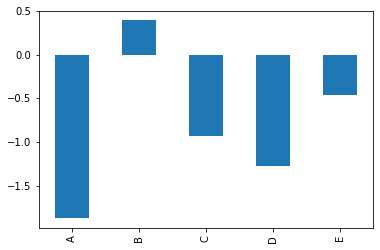

In [22]:
# Select column then plot it as bar chart
df['X'].plot(kind='bar')

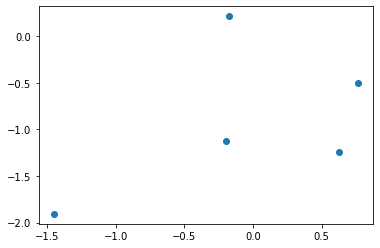

In [23]:
# Scatterplot between two columns
plt.scatter(df['W'],df['new column'])

### 2.4 *scikit-learn*
Machine Learning

In [24]:
# Import necessary functions of the package
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn import linear_model
import sklearn.ensemble

In [25]:
# Specify the features (explanatory variables) and label (target variable)
X = df[['X']]
y = df['new column']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
# define the model
reg = sklearn.linear_model.LinearRegression() # could be any other appropriate model

In [27]:
# Fit the model onto the data
reg.fit(X_train,y_train) # Only on training data! 

# predict on test data
y_hat = reg.predict(X_test) # predict on test data (we only have X, we are predicting y!)

In [28]:
# Get error metrics - how did we do?

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hat)) ) # still, pretty bad
print('MAPE:', mean_absolute_percentage_error(y_test,y_hat) ) # pretty bad

RMSE: 1.0763165620358728
MAPE: 0.40417515812600296


## 3. Functions

### 3.1 User-Defined Functions

In [29]:
# defining the simple function that adds 1 (+1)
def add_one( x ):
    x = x + 1
    return x

# calling the function
add_one( 12 )

13

In [30]:
# defining the funtion that gets the date of the week for us!
def get_day_of_week(date):
    date = pd.to_datetime(date)
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return days[date.weekday()]

# calling the function
get_day_of_week('2022-07-18')

'Monday'

### 3.2 for/if/while functions

In [1]:
# For every number in the range of zero to five, print the number.

for i in range(0,5):
    print(i)

0
1
2
3
4


In [7]:
# For every number in the range of zero to five, print the number. If the number is 3, don't print the number but instead print "Three".

for i in range(0,5):

    if i==3:
        print ('Three')
    else:
        print(i)

0
1
2
Three
4


## Good Luck!